# **Glass Classification**

<img src='https://pfst.cf2.poecdn.net/base/image/3dd771fff7976f4e37d520edafbb1d8d6866f8c61744a3c62ddbea2a2c7c3221?w=1024&h=768&pmaid=449073030)' width='700'>
<a href='https://www.kaggle.com/datasets/uciml/glass' target=_blank>
Click here for the dataset </a>

Bu projede, UCI'den Cam Tanımlama Veri Seti'ni analiz ediyoruz. Kimyasal bileşimler ve fiziksel özellikler dahil toplam 10 niteliğe sahip olan bu veri seti, cam türlerini makine öğrenimi ile sınıflandırmayı amaçlamaktadır. Bu analiz sonuçları, malzeme özelliklerini ve uygulamalarını daha iyi anlamaya katkıda bulunmayı hedeflemektedir.

**Data Dictionary**



| **Column Name**                    | **Description**                                                                    | **Turkish Translation**           |
|------------------------------------|------------------------------------------------------------------------------------|-----------------------------------|
| Id                                 | A unique identifier for each glass sample.                                        | Cam Örneği Kimliği                |
| RI                                 | Refractive index of the glass.                                                    | Kırılma İndeksi                   |
| Na                                 | Sodium content (weight percent in corresponding oxide).                           | Sodyum İçeriği                    |
| Mg                                 | Magnesium content (weight percent in corresponding oxide).                        | Magnezyum İçeriği                 |
| Al                                 | Aluminum content (weight percent in corresponding oxide).                         | Alüminyum İçeriği                 |
| Si                                 | Silicon content (weight percent in corresponding oxide).                          | Silikon İçeriği                   |
| K                                  | Potassium content (weight percent in corresponding oxide).                        | Potasyum İçeriği                  |
| Ca                                 | Calcium content (weight percent in corresponding oxide).                          | Kalsiyum İçeriği                  |
| Ba                                 | Barium content (weight percent in corresponding oxide).                           | Baryum İçeriği                    |
| Fe                                 | Iron content (weight percent in corresponding oxide).                             | Demir İçeriği                     |
| Type of glass                      | Class attribute representing the type of glass (7 discrete values).              | Cam Türü                          |

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import warnings
warnings.filterwarnings('ignore')

**Read the data**

In [8]:
df = pd.read_csv('glass.csv')

**EDA - Exploratory Data Analysis**

In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
df.shape

(214, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [17]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [21]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [23]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [25]:
df.corr(numeric_only=True)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


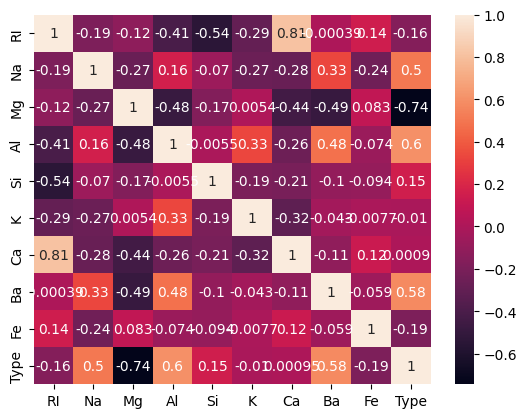

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

**Feature Engineering**

Data Preparation - Separation of Features and Target Variables

In [31]:
x = df.drop('Type', axis=1)
y = df['Type']

**Modelling**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [40]:
g=GaussianNB()
b=BernoulliNB()

In [42]:
g.fit(x_train,y_train)

GaussianNB()

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [46]:
gtahmin=g.predict(x_test)

In [48]:
accuracy_score(gtahmin,y_test)

0.5581395348837209

In [50]:
confusion_matrix(gtahmin,y_test)

array([[7, 9, 1, 0, 0, 0],
       [1, 3, 0, 3, 0, 0],
       [3, 0, 2, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 1, 0, 0, 0, 8]], dtype=int64)

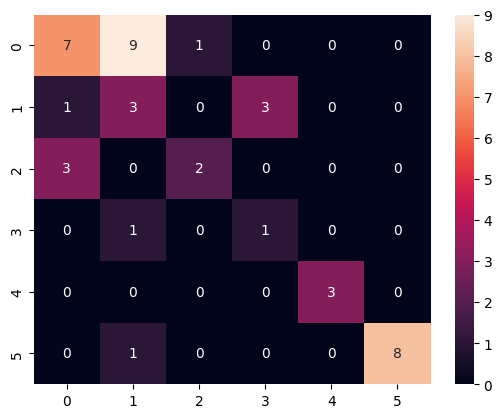

In [52]:
sns.heatmap(confusion_matrix(gtahmin,y_test),annot=True);

In [53]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           1       0.64      0.41      0.50        17
           2       0.21      0.43      0.29         7
           3       0.67      0.40      0.50         5
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.56        43
   macro avg       0.63      0.60      0.59        43
weighted avg       0.65      0.56      0.58        43



In [56]:
# Decision Tree Model

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
d=DecisionTreeClassifier()

In [62]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
dtahmin=d.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, dtahmin)

In [68]:
print("Accuracy:", accuracy)

Accuracy: 0.8372093023255814


In [70]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           1       0.91      0.71      0.80        14
           2       0.64      0.90      0.75        10
           3       1.00      0.75      0.86         4
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.84        43
   macro avg       0.88      0.88      0.87        43
weighted avg       0.87      0.84      0.84        43



In [72]:
confusion_matrix(dtahmin,y_test)

array([[10,  4,  0,  0,  0,  0],
       [ 0,  9,  0,  1,  0,  0],
       [ 0,  1,  3,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  0,  0,  0,  0,  8]], dtype=int64)

In [74]:
# Sonuc
# Decision Tree Model modeli en yüksek score verdi 
# f1-score 0.83